In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
import math
import datetime

import tensorflow as tf
import warnings
warnings.filterwarnings(action='ignore')

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/handwritten-digit-recognition/train.csv
/kaggle/input/handwritten-digit-recognition/test.csv


# Load the dataset

In [2]:
train = pd.read_csv("/kaggle/input/handwritten-digit-recognition/train.csv")
test = pd.read_csv("/kaggle/input/handwritten-digit-recognition/test.csv")

In [3]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [4]:
test.head()

,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
train.info(), train.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42000 entries, 0 to 41999
Columns: 785 entries, label to pixel783
dtypes: int64(785)
memory usage: 251.5 MB


(None, (42000, 785))

In [6]:
test.info(), test.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28000 entries, 0 to 27999
Columns: 784 entries, pixel0 to pixel783
dtypes: int64(784)
memory usage: 167.5 MB


(None, (28000, 784))

In [7]:
X = train.iloc[:, 1:785]
y = train.iloc[:, 0]

X_test = test.iloc[:, 0:784]

# Splitting dataset into training and testing

In [8]:
from sklearn.model_selection import train_test_split

X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=1212)

In [9]:
print('X_train:', X_train.shape)
print('y_train:', y_train.shape)
print('X_validation:', X_val.shape)
print('y_validation:', y_val.shape)

X_train: (33600, 784)
y_train: (33600,)
X_validation: (8400, 784)
y_validation: (8400,)


# Converting training, testing, and validation data into array

In [10]:
x_train_re = X_train.to_numpy().reshape(33600, 28, 28)
y_train_re = y_train.values
x_validation_re = X_val.to_numpy().reshape(8400, 28, 28)
y_validation_re = y_val.values
x_test_re = test.to_numpy().reshape(28000, 28, 28)

In [11]:
print('x_train:', x_train_re.shape)
print('y_train:', y_train_re.shape)
print('x_validation:', x_validation_re.shape)
print('y_validation:', y_validation_re.shape)
print('x_test:', x_test_re.shape)

x_train: (33600, 28, 28)
y_train: (33600,)
x_validation: (8400, 28, 28)
y_validation: (8400,)
x_test: (28000, 28, 28)


* Save image parameters to the constants that we will use later for data re-shaping and for model traning.

In [12]:
(_, IMAGE_WIDTH, IMAGE_HEIGHT) = x_train_re.shape
IMAGE_CHANNELS = 1

print('IMAGE_WIDTH:', IMAGE_WIDTH)
print('IMAGE_HEIGHT:', IMAGE_HEIGHT)
print('IMAGE_CHANNELS:', IMAGE_CHANNELS)

IMAGE_WIDTH: 28
IMAGE_HEIGHT: 28
IMAGE_CHANNELS: 1


# Visualization

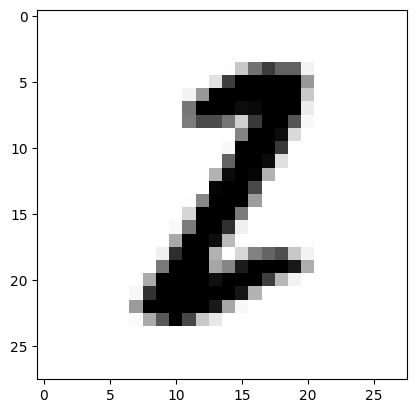

In [13]:
plt.imshow(x_train_re[0], cmap=plt.cm.binary)
plt.show()

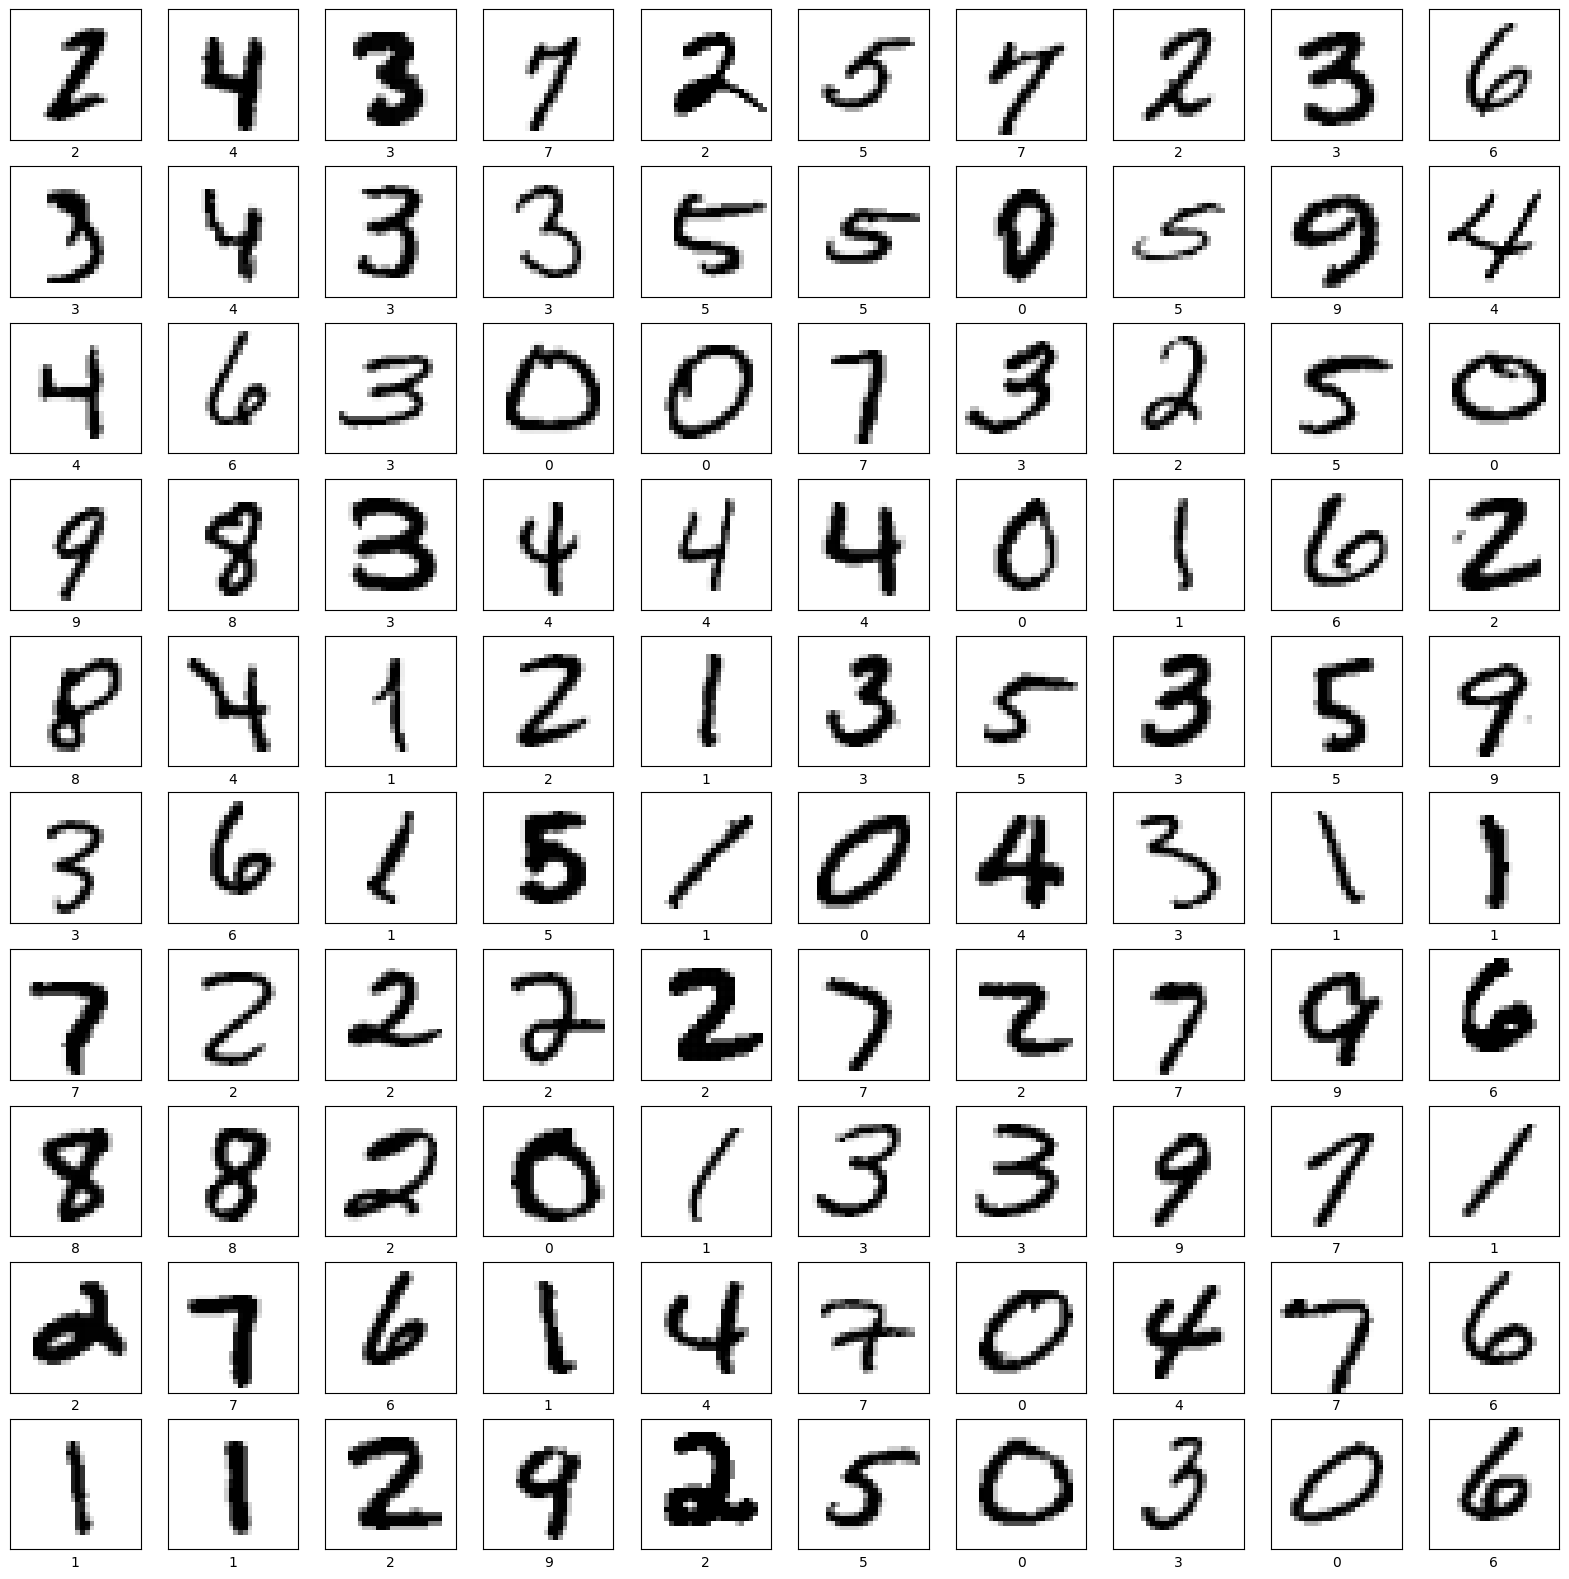

In [14]:
numbers_to_display = 100
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(20,20))
for i in range(numbers_to_display):
    plt.subplot(num_cells, num_cells, i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train_re[i], cmap=plt.cm.binary)
    plt.xlabel(y_train_re[i])
plt.show()

# Reshaping train,test, and validation data

In [15]:
x_train_with_chanels = x_train_re.reshape(
    x_train_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_validation_with_chanels = x_validation_re.reshape(
    x_validation_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

x_test_with_chanels = x_test_re.reshape(
    x_test_re.shape[0],
    IMAGE_WIDTH,
    IMAGE_HEIGHT,
    IMAGE_CHANNELS
)

In [16]:
print('x_train_with_chanels:', x_train_with_chanels.shape)
print('x_validation_with_chanels:', x_validation_with_chanels.shape)
print('x_test_with_chanels:', x_test_with_chanels.shape)

x_train_with_chanels: (33600, 28, 28, 1)
x_validation_with_chanels: (8400, 28, 28, 1)
x_test_with_chanels: (28000, 28, 28, 1)


# Normalize train, test, and validation dataset

In [17]:
x_train_normalized = x_train_with_chanels / 255
x_validation_normalized = x_validation_with_chanels / 255
x_test_normalized = x_test_with_chanels / 255

# Model - CNN

In [18]:
from keras.models import Sequential # Sequential model
from keras.layers import Convolution2D, MaxPooling2D, Dense, Dropout, Flatten # all layers
from keras.activations import softmax, relu # activation function
from keras.initializers import VarianceScaling # Layer weight initializers

In [19]:
model = Sequential()

model.add(Convolution2D(input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, IMAGE_CHANNELS),
    kernel_size=5,
    filters=8,
    strides=1,
    activation=relu,
    kernel_initializer=VarianceScaling()))
model.add(MaxPooling2D(pool_size=(2,2), strides=(2,2)))

model.add(Convolution2D(kernel_size=5, filters=16, strides=1, activation=relu,
    kernel_initializer=VarianceScaling()))
model.add(MaxPooling2D(pool_size=(2, 2),strides=(2, 2)))
model.add(Flatten())

model.add(Dense(units=128,activation=relu))
model.add(Dropout(0.2))

model.add(tf.keras.layers.Dense(
    units=10,
    activation=softmax,
    kernel_initializer=VarianceScaling()))

In [20]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 8)         208       
                                                                 
 max_pooling2d (MaxPooling2  (None, 12, 12, 8)         0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 8, 8, 16)          3216      
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 4, 4, 16)          0         
 g2D)                                                            
                                                                 
 flatten (Flatten)           (None, 256)               0         
                                                                 
 dense (Dense)               (None, 128)               3

In [21]:
from keras.optimizers import Adam
from keras.losses import sparse_categorical_crossentropy

model.compile(optimizer=Adam(), loss=sparse_categorical_crossentropy, metrics=['accuracy'])


# Train the model

In [22]:
training_history = model.fit(
    x_train_normalized,
    y_train_re,
    epochs=15,
    validation_data=(x_validation_normalized, y_validation_re)
)

print("The model has successfully trained")

Epoch 1/15
1050/1050 [==============================] - 12s 10ms/step - loss: 0.2820 - accuracy: 0.9135 - val_loss: 0.1091 - val_accuracy: 0.9639
Epoch 2/15
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0934 - accuracy: 0.9716 - val_loss: 0.0678 - val_accuracy: 0.9770
Epoch 3/15
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0671 - accuracy: 0.9791 - val_loss: 0.0609 - val_accuracy: 0.9806
Epoch 4/15
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0545 - accuracy: 0.9824 - val_loss: 0.0510 - val_accuracy: 0.9832
Epoch 5/15
1050/1050 [==============================] - 10s 10ms/step - loss: 0.0436 - accuracy: 0.9860 - val_loss: 0.0523 - val_accuracy: 0.9843
Epoch 6/15
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0374 - accuracy: 0.9874 - val_loss: 0.0501 - val_accuracy: 0.9851
Epoch 7/15
1050/1050 [==============================] - 11s 10ms/step - loss: 0.0327 - accuracy: 0.9895 - val_loss: 0.0539 -

# Model Evaluation

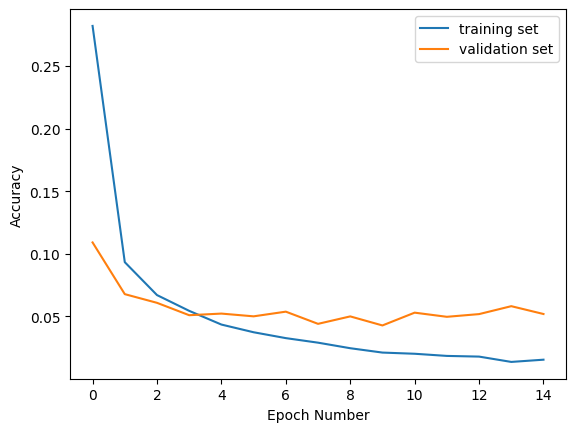

In [23]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['loss'], label='training set')
plt.plot(training_history.history['val_loss'], label='validation set')
plt.legend()

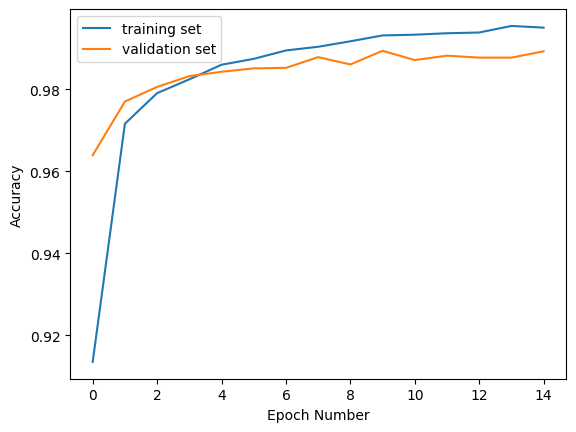

In [24]:
plt.xlabel('Epoch Number')
plt.ylabel('Accuracy')
plt.plot(training_history.history['accuracy'], label='training set')
plt.plot(training_history.history['val_accuracy'], label='validation set')
plt.legend()

# Testing model on train and test dataset

In [25]:
train_loss, train_accuracy = model.evaluate(x_train_normalized, y_train_re)

1050/1050 [==============================] - 4s 4ms/step - loss: 0.0080 - accuracy: 0.9975


In [26]:
print('Train loss: ', round(train_loss,2)*100, '%')
print('Train accuracy: ', round(train_accuracy, 2)*100, '%')

Train loss:  1.0 %
Train accuracy:  100.0 %


In [27]:
test_loss, test_accuracy = model.evaluate(x_validation_normalized, y_validation_re)

263/263 [==============================] - 1s 4ms/step - loss: 0.0520 - accuracy: 0.9893


In [28]:
print('test loss: ', round(test_loss, 2)*100, '%')
print('test accuracy: ', round(test_accuracy,2)*100, '%')

test loss:  5.0 %
test accuracy:  99.0 %


# Save the model

In [29]:
model_name = 'digits_recognition_cnn.h5'
model.save(model_name, save_format='h5')

In [30]:
# Load the model
loaded_model = tf.keras.models.load_model(model_name)

In [31]:
predictions_one_hot = loaded_model.predict([x_validation_normalized])

263/263 [==============================] - 1s 3ms/step


In [32]:
print('predictions_one_hot:', predictions_one_hot.shape)

predictions_one_hot: (8400, 10)


In [33]:
# Let's extract predictions with highest probabilites and detect what digits have been actually recognized.
predictions = np.argmax(predictions_one_hot, axis=1)
pd.DataFrame(predictions, columns=['digit']).head()

,digit
0,1
1,3
2,8
3,1
4,9


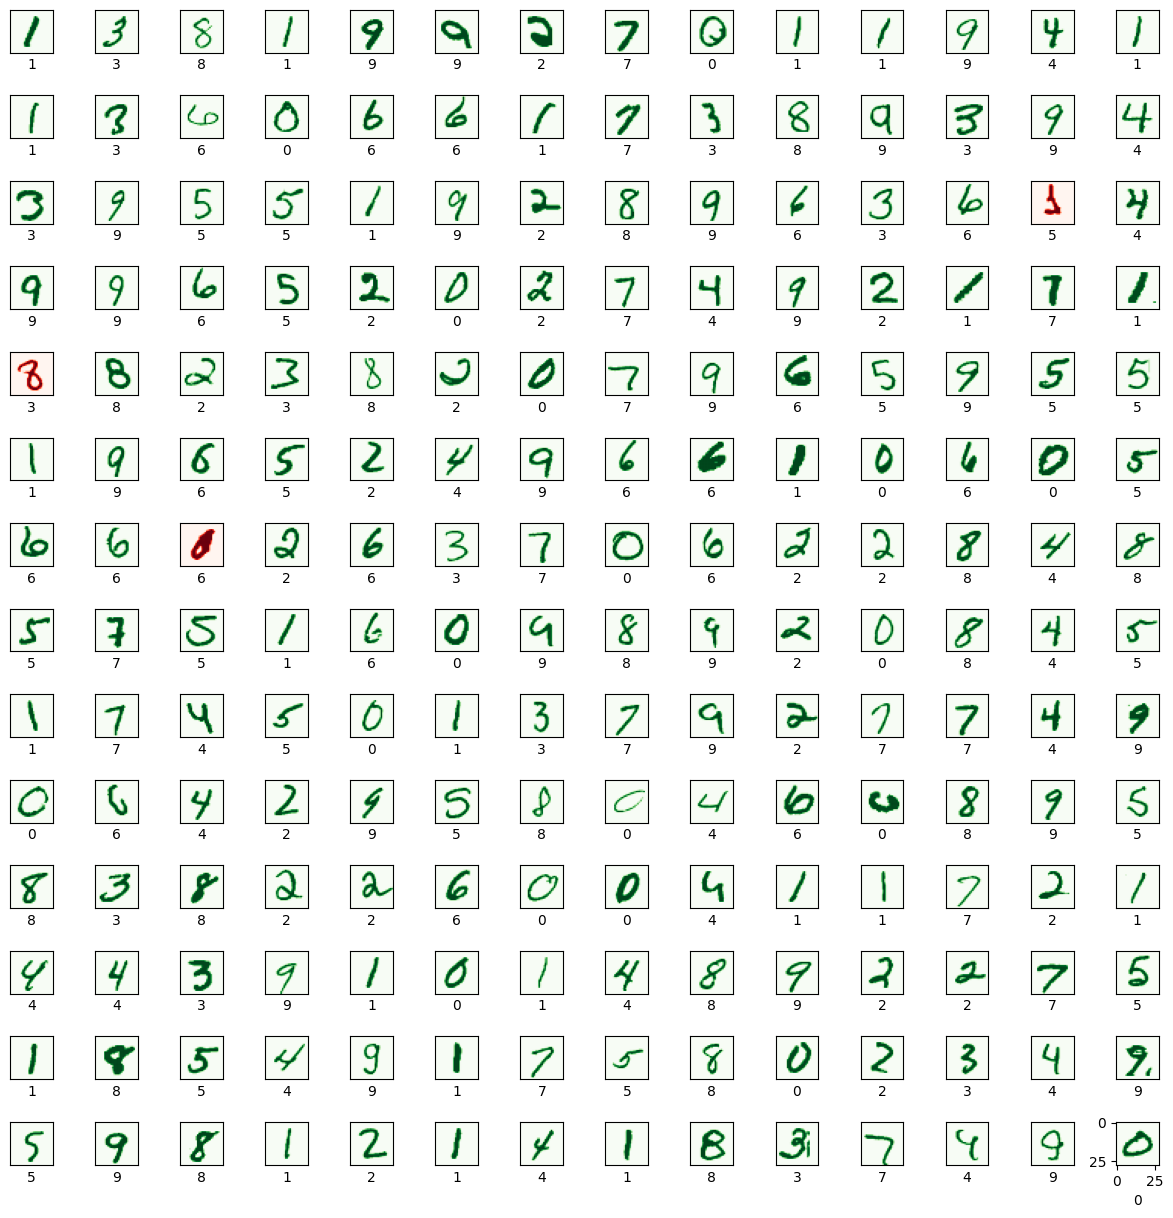

In [34]:
numbers_to_display = 196
num_cells = math.ceil(math.sqrt(numbers_to_display))
plt.figure(figsize=(15, 15))

for plot_index in range(numbers_to_display):    
    predicted_label = predictions[plot_index]
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    color_map = 'Greens' if predicted_label == y_validation_re[plot_index] else 'Reds'
    plt.subplot(num_cells, num_cells, plot_index + 1)
    plt.imshow(x_validation_normalized[plot_index].reshape((IMAGE_WIDTH, IMAGE_HEIGHT)), cmap=color_map)
    plt.xlabel(predicted_label)

plt.subplots_adjust(hspace=1, wspace=0.5)
plt.show()